In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 4: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [3]:

def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    X_valid, y_valid = load('./data/regression/regression_valid.csv')
    return X_train, y_train, X_test, y_test, X_valid, y_valid

X_train, y_train, X_test, y_test, X_valid, y_valid= get_data()


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)
print('Valid data shape: ',X_valid.shape)
print('Valid target shape: ',y_valid.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)
Valid data shape:  (20, 1)
Valid target shape:  (20,)


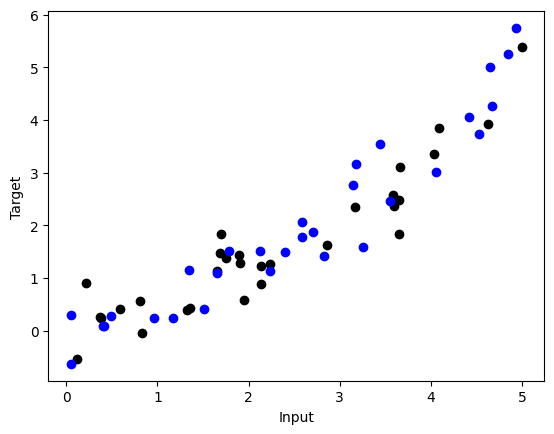

In [4]:
## PART (a):
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [5]:
from codes.Regression import Regression

In [6]:
## PART (c):
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 1.0455416122950603
Gradient value [[1.33142275]
 [2.65167278]]


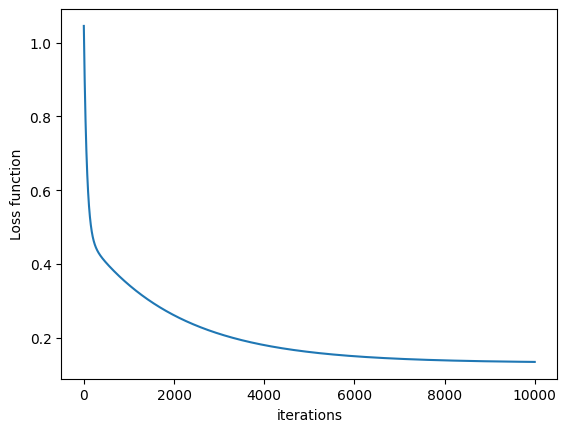

[[-0.2444182 ]
 [ 0.83978488]]
Final loss: 0.134582019025181


In [7]:
## PART (d):
## Complete train_LR function in Regression.py file
loss_history, theta = regression.train_LR(X_train,y_train, alpha=1e-3, B=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(theta)
print('Final loss:',loss_history[-1])

In [53]:
losses = np.zeros((len(alphas),10000))
alphas = [1e-1, 1e-2, 1e-3, 1e-4]
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
Bs = [1,10,20,30]
# ================================================================ #
# YOUR CODE HERE:
# Train the Linear regression for different learning rates
# ================================================================ #
for i, B in enumerate(Bs):
    loss_history, _ = regression.train_LR(X_train, y_train, alpha=1e-2, B=B, num_iters=10000)
    losses[i, :len(loss_history)] = loss_history
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
for i, loss in enumerate(losses):
    plt.plot(range(10000), loss, label='Batch='+str(Bs[i]))
plt.xlabel('Iterations')
plt.ylabel('Training loss')
plt.legend()
plt.show()

NameError: name 'alphas' is not defined

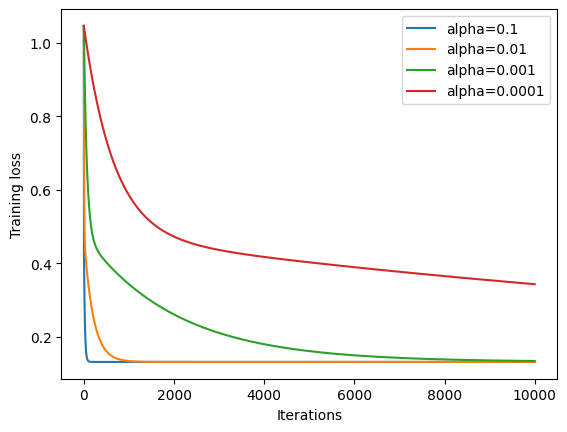

In [54]:
## PART (d) (Different Alpha(learning rates):
from numpy.linalg import norm
alphas = [1e-1, 1e-2, 1e-3, 1e-4]
   #losses = np.zeros((len(Bs),10000))
losses = []
for alpha in alphas:
    regression = Regression(m=1,reg_param=0)  #WE ARE USING NO REGULARIZATION!!!
    loss_history, _ = regression.train_LR(X_train, y_train, alpha=alpha, B=30, num_iters=10000)
    losses.append(loss_history)
max_length = max(len(loss_history) for loss_history in losses)
fig = plt.figure()
for i, loss in enumerate(losses):
    plt.plot(range(10000), loss, label='alpha='+str(alphas[i]))
plt.xlabel('Iterations')
plt.ylabel('Training loss')
plt.legend()
plt.show()

In [ ]:
## PART (e):
## Complete closed_form function in Regression.py file
loss_2, theta_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution theta',theta_2)

Optimal solution loss 0.26417938203964436
Optimal solution theta [ 0.8852483  -0.37906992]


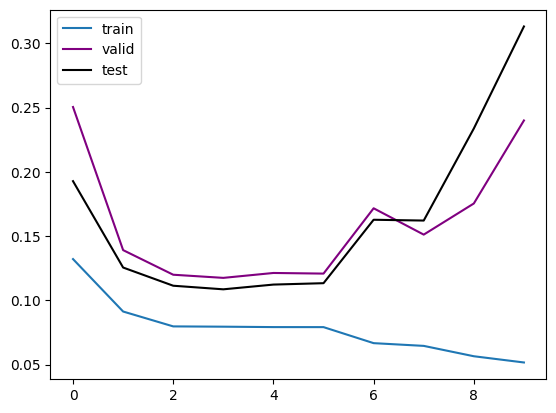

In [16]:
## PART (f):
train_loss=np.zeros((10,1))
valid_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
for m in range(0,10):
    regression = Regression(m=m+1, reg_param=0)
    train_loss[m] = regression.closed_form(X_train, y_train)[0]
    valid_loss[m] = regression.loss_and_grad(X_valid,y_valid)[0]
    test_loss[m] = regression.loss_and_grad(X_test,y_test)[0]
# ================================================================ #
plt.plot(train_loss, label='train')
plt.plot(valid_loss, color='purple', label='valid')
plt.plot(test_loss, color='black', label='test')
plt.legend()
plt.show()

[-0.37906992  0.8852483 ]
[0.22993687 0.12801574 0.15762741]
[-0.11138388  0.97669301 -0.28469214  0.06087253]
[-0.0336628   0.66686576 -0.01344084 -0.02082386  0.00790944]
[ 0.06729148  0.12344131  0.72423718 -0.41538593  0.09753874 -0.00722297]
[ 0.10518313 -0.14423016  1.23841896 -0.81927015  0.24681095 -0.03314641
  0.00170605]
[ -0.97545067   9.22806976 -22.19147996  24.23167711 -13.23041629
   3.79118411  -0.54428364   0.03087456]
[-1.55125815e+00  1.51723831e+01 -4.08470234e+01  5.02570684e+01
 -3.22438317e+01  1.15792778e+01 -2.34289088e+00  2.49407431e-01
 -1.08544678e-02]
[-2.92500438e+00  3.18474297e+01 -1.05360750e+02  1.64595315e+02
 -1.41273097e+02  7.21147430e+01 -2.24836500e+01  4.20098234e+00
 -4.31943976e-01  1.87797840e-02]
[-8.29931504e-01  3.10792434e+00  2.67984074e+01 -1.20221561e+02
  1.96140020e+02 -1.67063105e+02  8.32037232e+01 -2.51301009e+01
  4.53416936e+00 -4.49682596e-01  1.88611198e-02]


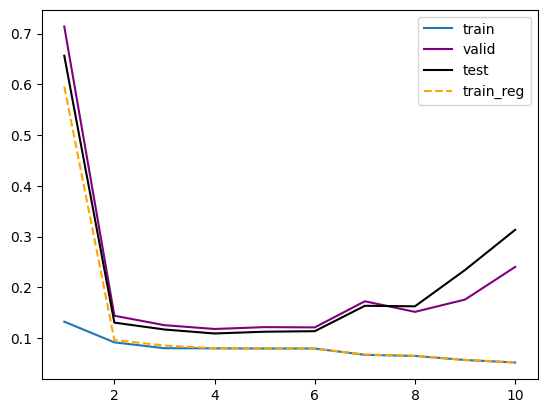

In [52]:
#PART (g):
train_loss=np.zeros((10,1))
train_reg_loss=np.zeros((10,1))
valid_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
lambdas = [10**(-i) for i in range(10)] 
for m in range(0,10):
    regression = Regression(m=m+1, reg_param=lambdas[m])
    regression2 = Regression(m=m+1, reg_param=0)
    train_loss[m], theta = regression2.closed_form(X_train, y_train)
    print(theta)
    train_reg_loss[m] = regression.closed_form(X_train, y_train)[0]
    valid_loss[m] = regression.loss_and_grad(X_valid,y_valid)[0]
    test_loss[m] = regression.loss_and_grad(X_test,y_test)[0]
plt.plot(np.arange(1, 11),train_loss, label='train')
plt.plot(np.arange(1, 11), valid_loss, color='purple', label='valid')
plt.plot(np.arange(1, 11), test_loss, color='black', label='test')
plt.plot(np.arange(1, 11), train_reg_loss, color = 'orange', linestyle="dashed", label='train_reg')
plt.legend()
plt.show()